In [ ]:
# Room Occupancy Estimation

In [144]:
#  Objective :

Develop a binary classification model to predict room occupancy based on sensor data (temperature, humidity, light, CO₂, and humidity ratio). The goal is to improve accuracy in detecting occupancy using machine learning techniques, including data preprocessing, feature engineering, and model evaluation.

In [ ]:
#  Import Libraries And Load Data

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,confusion_matrix

In [41]:
data = pd.read_csv("Occupancy_Estimation.csv")

In [42]:
df = pd.DataFrame(data)

In [43]:
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [44]:
df.columns

Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')

In [45]:
df.shape

(10129, 19)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [47]:
df.dtypes

Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object

In [48]:
df = df.drop(columns=['Time'])

In [49]:
df = df.drop(columns=['Date'])

In [50]:
df.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [51]:
# data cleaning

In [52]:
df.isnull().sum()

S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [53]:
df.duplicated().sum()

1301

In [54]:
target_value_count = df["Room_Occupancy_Count"].value_counts()

In [55]:
target_value_count

Room_Occupancy_Count
0    8228
2     748
3     694
1     459
Name: count, dtype: int64

In [56]:
df.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [57]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [58]:
from collections import Counter
from imblearn.over_sampling import SMOTE

X = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
})
y = pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])  # Example target variable

# Check the class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y))



Class distribution before SMOTE: Counter({0: 9, 1: 1})


In [59]:
print("Class distribution before SMOTE:", Counter(df['Room_Occupancy_Count']))

Class distribution before SMOTE: Counter({0: 8228, 2: 748, 3: 694, 1: 459})


In [ ]:
#  Here we can analyze whether our data is balanced or not

In [60]:
X = df.drop(columns=['Room_Occupancy_Count'])  
y = df['Room_Occupancy_Count']   

In [61]:
ssmote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [62]:
print("Class distribution after SMOTE:", Counter(y_smote))

Class distribution after SMOTE: Counter({1: 8228, 2: 8228, 3: 8228, 0: 8228})


In [63]:
df_resampled = pd.DataFrame(X_smote, columns=X.columns)
df_resampled['Room_Occupancy_Count'] = y_smote
print(df_resampled.head())

   S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  S2_Light  S3_Light  S4_Light  \
0    24.94    24.75    24.56    25.38       121        34        53        40   
1    24.94    24.75    24.56    25.44       121        33        53        40   
2    25.00    24.75    24.50    25.44       121        34        53        40   
3    25.00    24.75    24.56    25.44       121        34        53        40   
4    25.00    24.75    24.56    25.44       121        34        54        40   

   S1_Sound  S2_Sound  S3_Sound  S4_Sound  S5_CO2  S5_CO2_Slope  S6_PIR  \
0      0.08      0.19      0.06      0.06     390      0.769231       0   
1      0.93      0.05      0.06      0.06     390      0.646154       0   
2      0.43      0.11      0.08      0.06     390      0.519231       0   
3      0.41      0.10      0.10      0.09     390      0.388462       0   
4      0.18      0.06      0.06      0.06     390      0.253846       0   

   S7_PIR  Room_Occupancy_Count  
0       0                   

In [64]:
df_resampled.head(2)

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1


In [65]:
df2= df_resampled.copy()

In [66]:
df2

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.940000,24.750000,24.560000,25.380000,121,34,53,40,0.080000,0.190000,0.060000,0.060000,390,0.769231,0,0,1
1,24.940000,24.750000,24.560000,25.440000,121,33,53,40,0.930000,0.050000,0.060000,0.060000,390,0.646154,0,0,1
2,25.000000,24.750000,24.500000,25.440000,121,34,53,40,0.430000,0.110000,0.080000,0.060000,390,0.519231,0,0,1
3,25.000000,24.750000,24.560000,25.440000,121,34,53,40,0.410000,0.100000,0.100000,0.090000,390,0.388462,0,0,1
4,25.000000,24.750000,24.560000,25.440000,121,34,54,40,0.180000,0.060000,0.060000,0.060000,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,25.833551,26.060000,25.750000,25.940000,3,3,13,10,0.834023,0.296636,0.219627,0.129813,750,2.162436,0,1,3
32908,26.199082,26.009082,25.759082,26.310000,150,238,185,11,1.148112,0.817891,2.641633,0.900595,780,3.310570,0,0,3
32909,26.250000,26.190000,25.880000,26.310000,149,234,185,10,0.624790,0.324835,0.229671,0.092066,894,3.778276,0,0,3
32910,26.060000,27.100100,25.965628,26.284372,164,254,275,70,0.236685,0.198242,0.850957,0.107186,910,1.576457,0,1,3


In [67]:
df2.shape

(32912, 17)

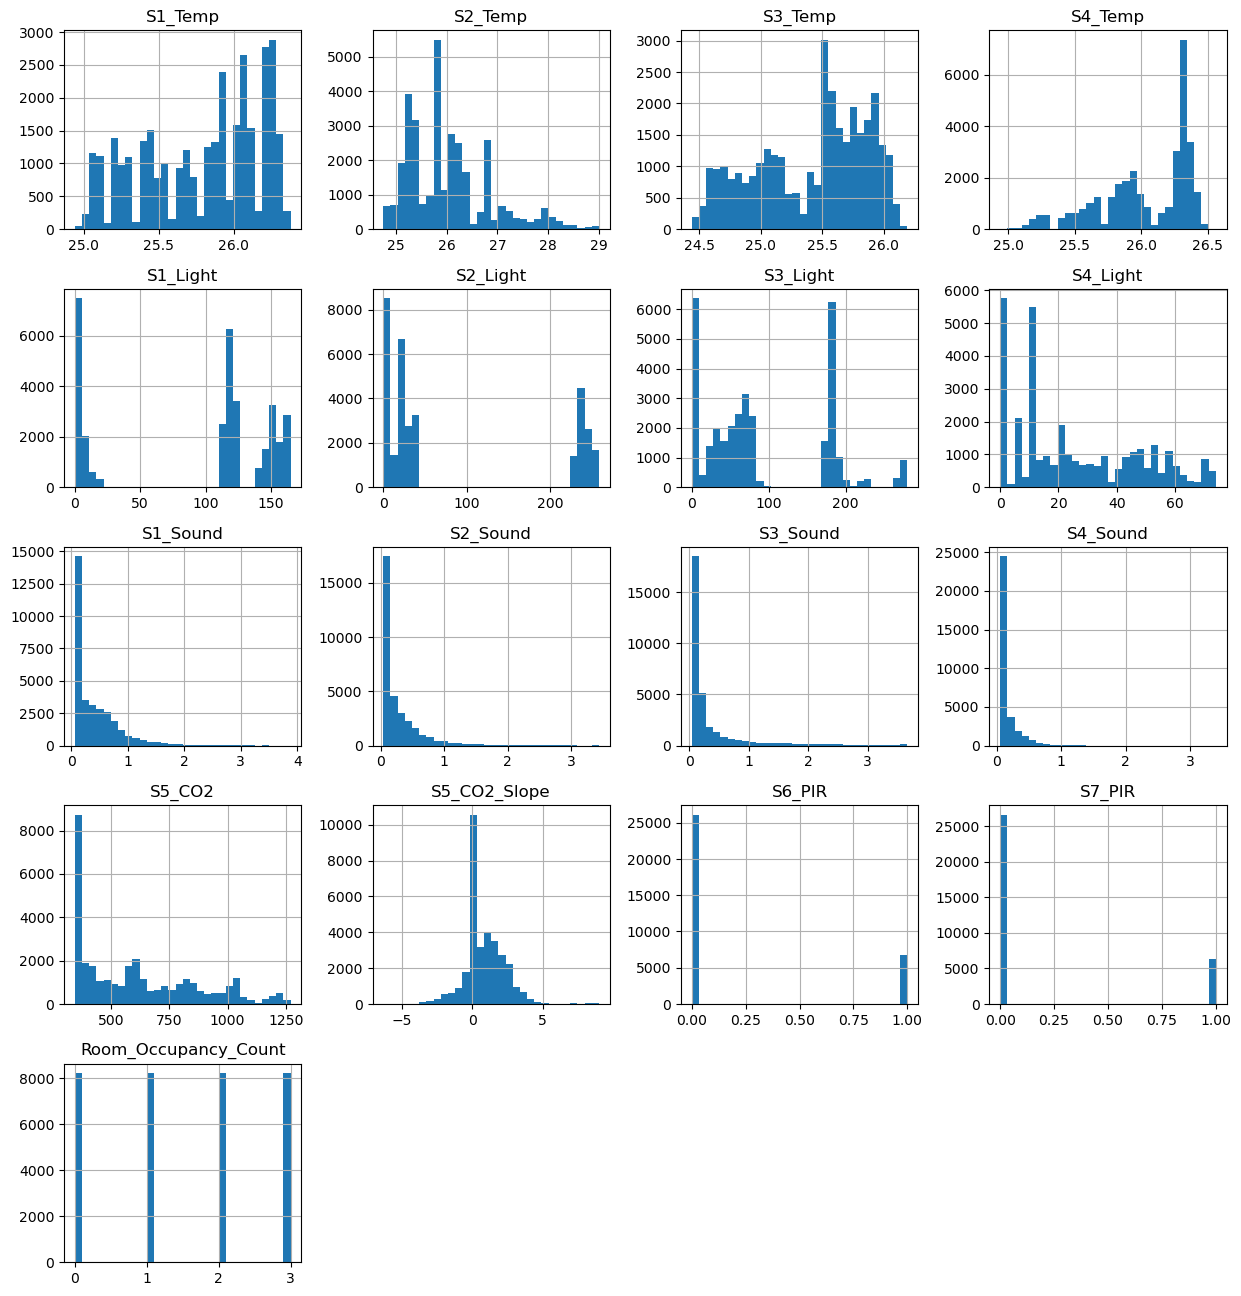

In [68]:
df2.hist(figsize=(15, 16), bins=30)
plt.show()

In [69]:
num_cols = df2.select_dtypes(include ='number')
for col in num_cols.columns:
    print(f"Value Counts for {col}:\n{num_cols[col].value_counts()}\n{'-'*40}")

Value Counts for S1_Temp:
S1_Temp
26.250000    2388
26.060000    2334
26.190000    2129
25.940000    2008
25.440000    1360
             ... 
26.038289       1
26.056696       1
25.631328       1
26.115312       1
26.199082       1
Name: count, Length: 6592, dtype: int64
----------------------------------------
Value Counts for S2_Temp:
S2_Temp
25.750000    2102
26.810000    1888
25.310000    1704
25.380000    1511
25.440000    1445
             ... 
26.704653       1
26.676416       1
27.883728       1
27.481104       1
27.100100       1
Name: count, Length: 9156, dtype: int64
----------------------------------------
Value Counts for S3_Temp:
S3_Temp
25.500000    2391
25.560000    1725
25.750000    1558
25.940000    1546
25.880000    1259
             ... 
25.954014       1
25.856387       1
25.072679       1
25.351756       1
25.965628       1
Name: count, Length: 6997, dtype: int64
----------------------------------------
Value Counts for S4_Temp:
S4_Temp
26.310000    5240
26.380000

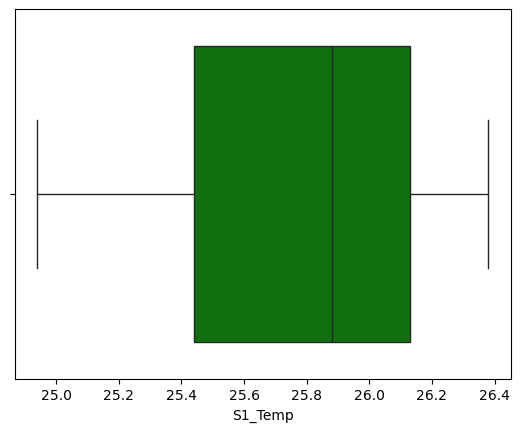

<Figure size 1200x600 with 0 Axes>

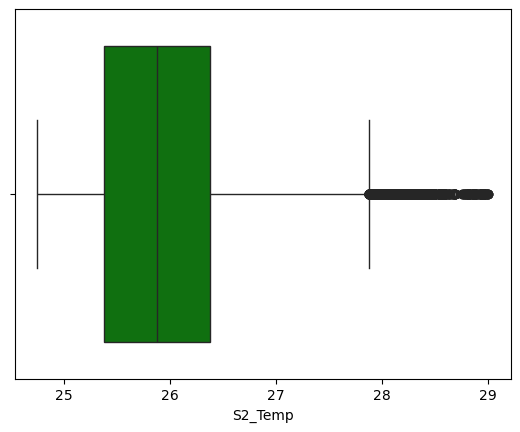

<Figure size 1200x600 with 0 Axes>

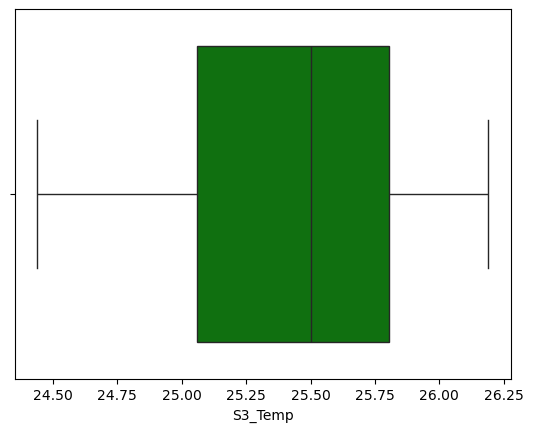

<Figure size 1200x600 with 0 Axes>

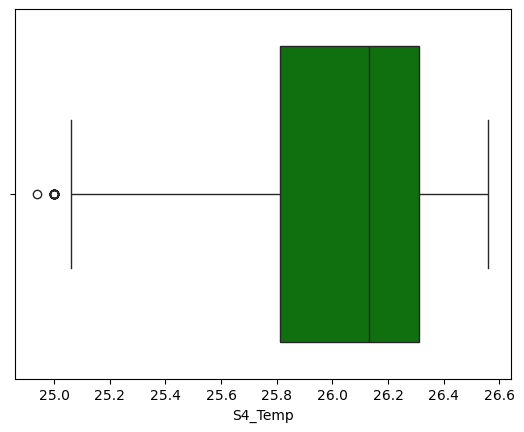

<Figure size 1200x600 with 0 Axes>

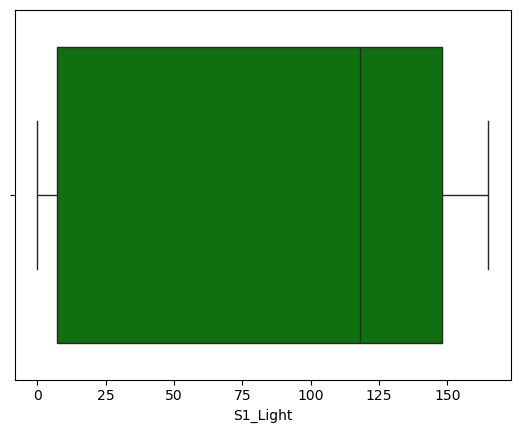

<Figure size 1200x600 with 0 Axes>

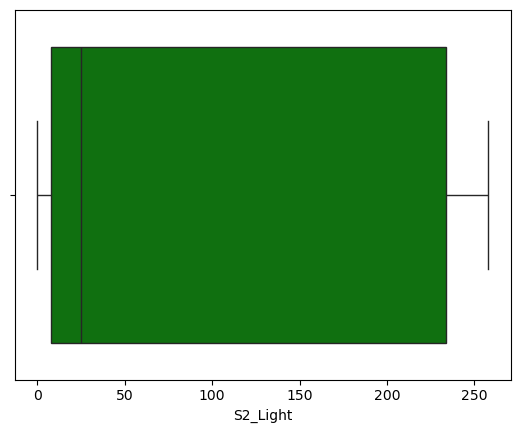

<Figure size 1200x600 with 0 Axes>

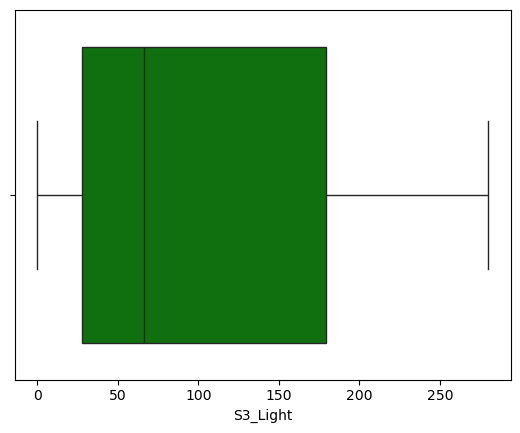

<Figure size 1200x600 with 0 Axes>

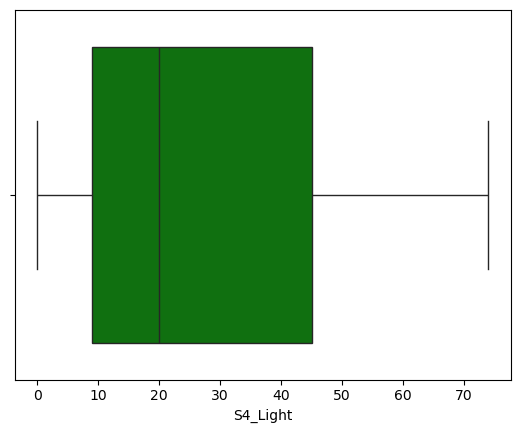

<Figure size 1200x600 with 0 Axes>

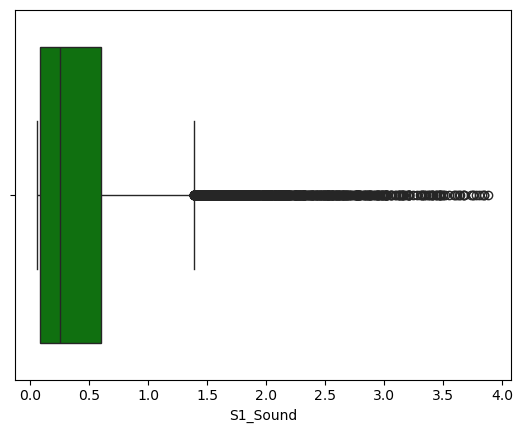

<Figure size 1200x600 with 0 Axes>

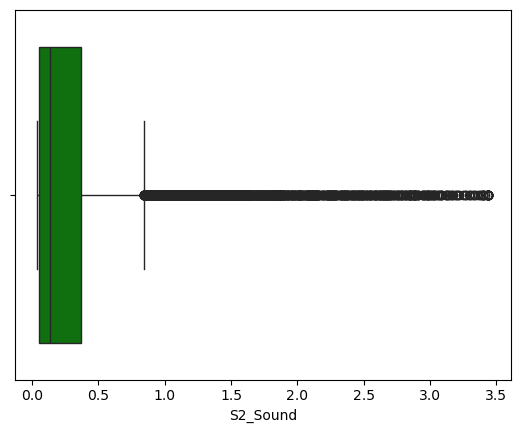

<Figure size 1200x600 with 0 Axes>

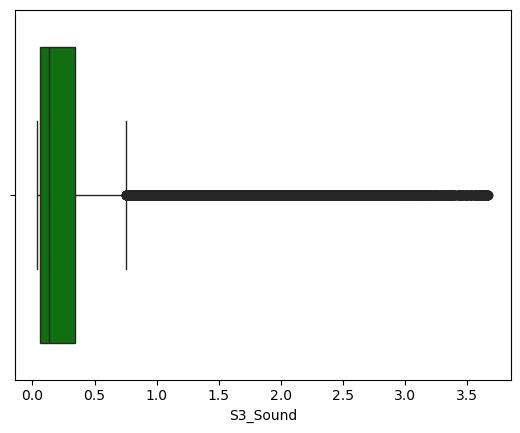

<Figure size 1200x600 with 0 Axes>

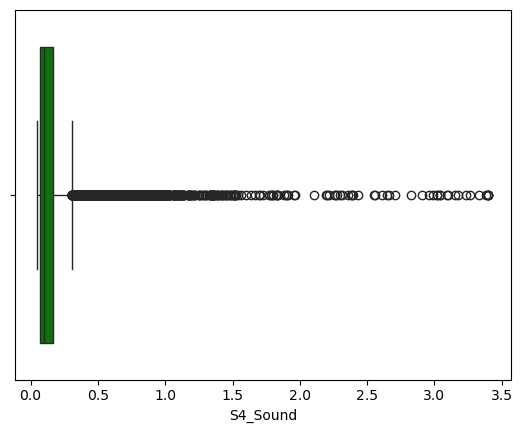

<Figure size 1200x600 with 0 Axes>

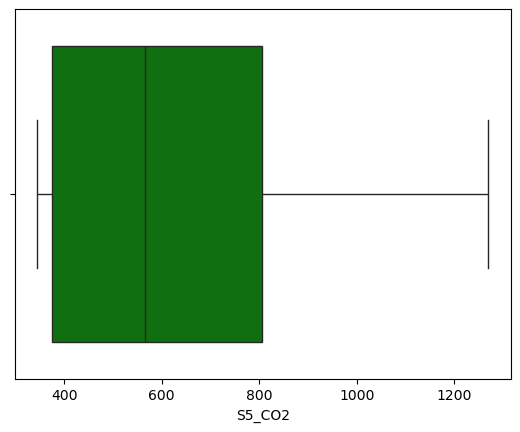

<Figure size 1200x600 with 0 Axes>

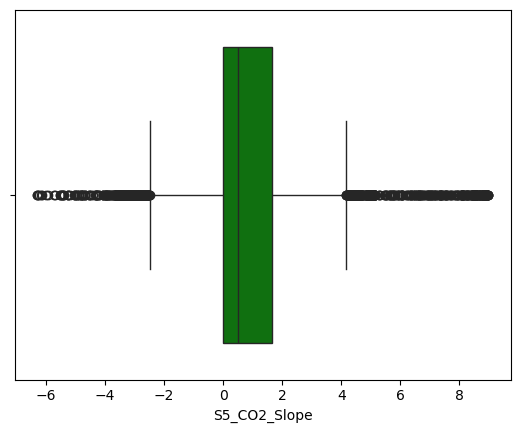

<Figure size 1200x600 with 0 Axes>

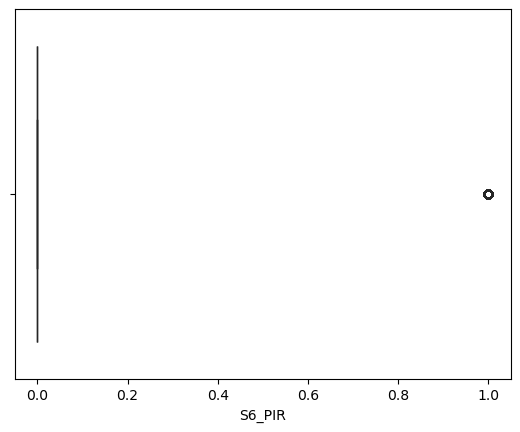

<Figure size 1200x600 with 0 Axes>

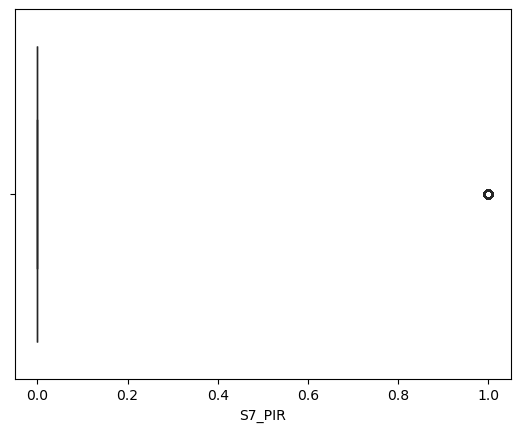

<Figure size 1200x600 with 0 Axes>

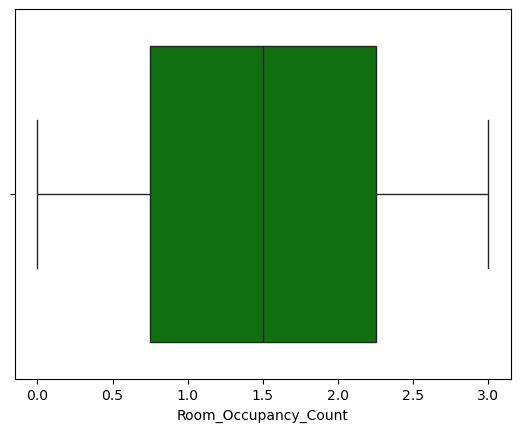

<Figure size 1200x600 with 0 Axes>

In [70]:
for i in num_cols.columns:
    sns.boxplot(x=i,data=df2,color ='g')
    plt.figure(figsize=(12, 6))
    plt.show()

In [71]:
#  remove outlier using IQR method¶

In [72]:
def remove_outliers(df):
    for col in df2.select_dtypes(include=['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 =df[col].quantile(0.75)

        IQR =Q3-Q1
        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5* IQR)

        #capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x >upper else x)
    return df

In [73]:
df3 = remove_outliers(df2)

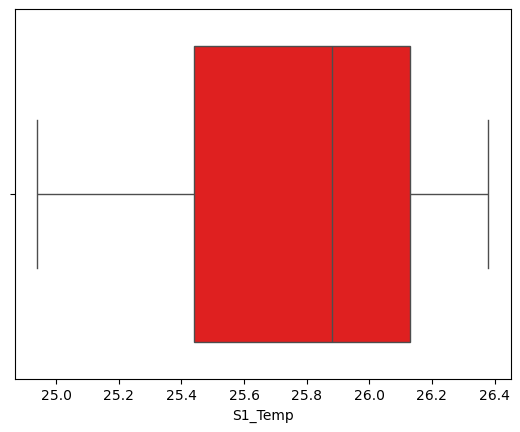

<Figure size 1200x600 with 0 Axes>

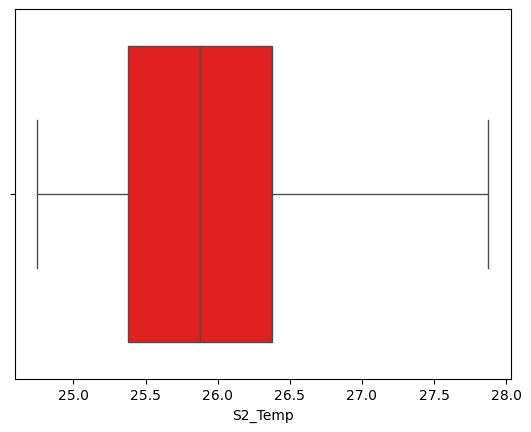

<Figure size 1200x600 with 0 Axes>

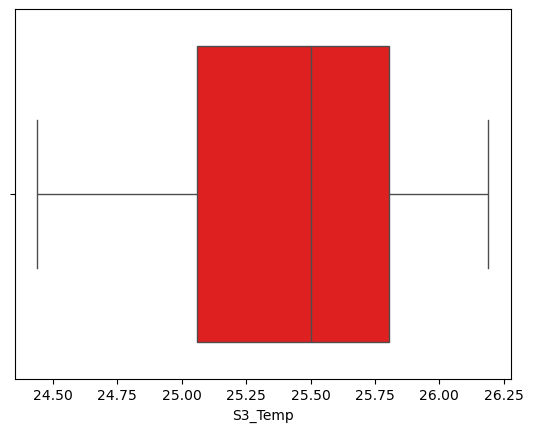

<Figure size 1200x600 with 0 Axes>

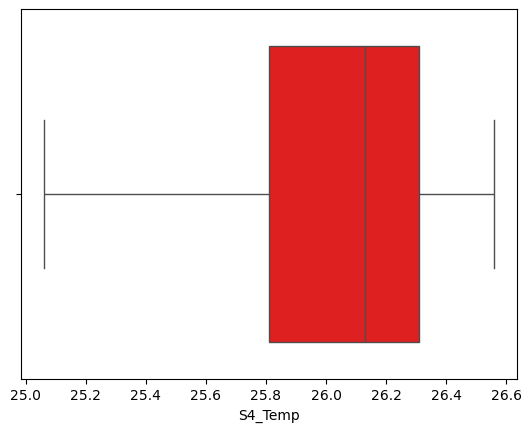

<Figure size 1200x600 with 0 Axes>

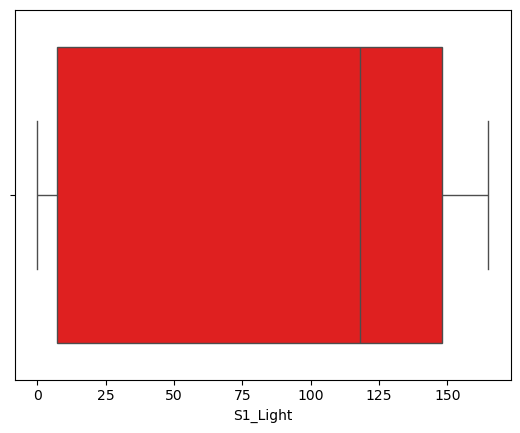

<Figure size 1200x600 with 0 Axes>

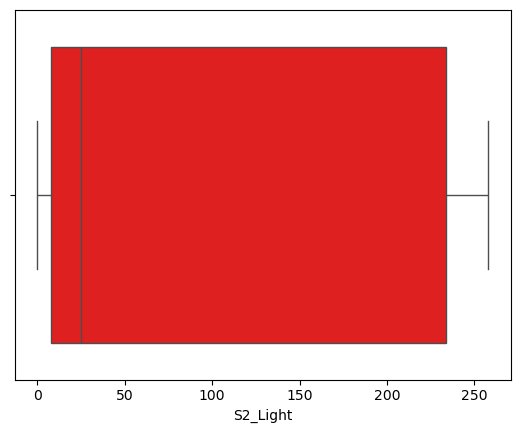

<Figure size 1200x600 with 0 Axes>

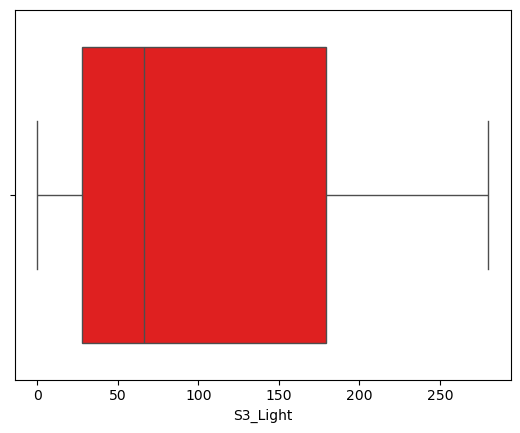

<Figure size 1200x600 with 0 Axes>

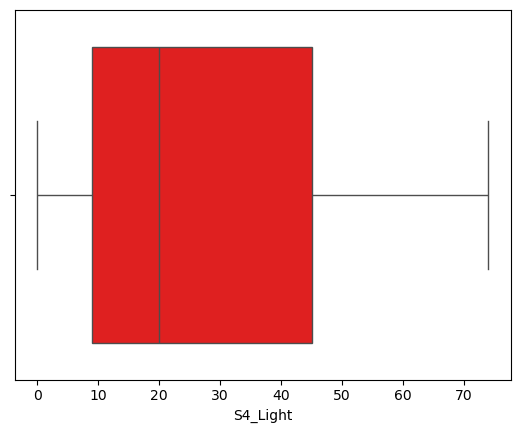

<Figure size 1200x600 with 0 Axes>

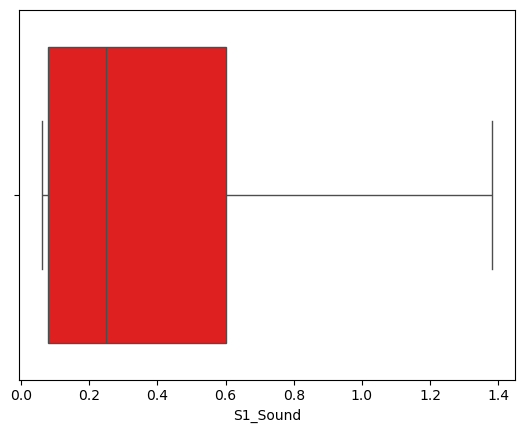

<Figure size 1200x600 with 0 Axes>

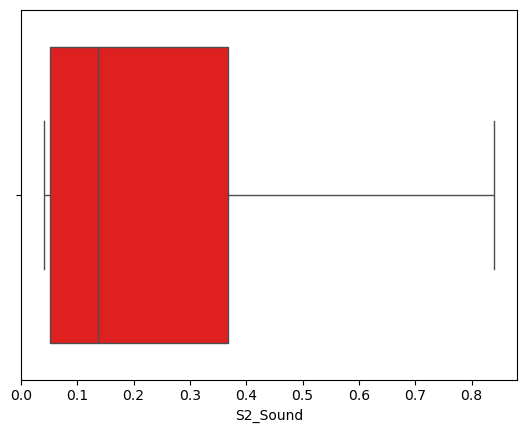

<Figure size 1200x600 with 0 Axes>

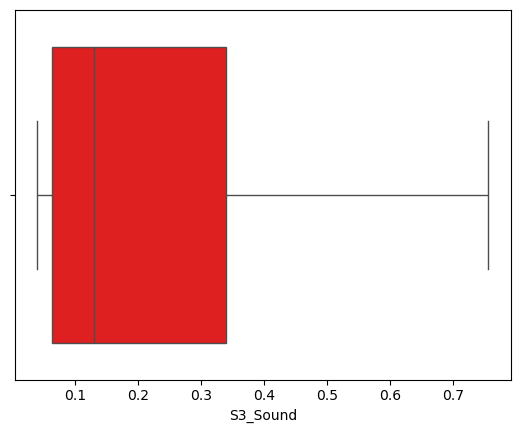

<Figure size 1200x600 with 0 Axes>

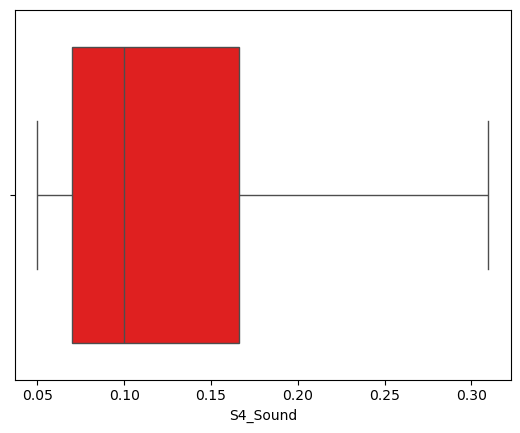

<Figure size 1200x600 with 0 Axes>

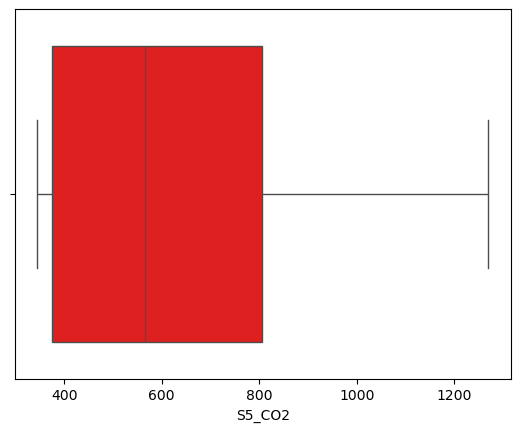

<Figure size 1200x600 with 0 Axes>

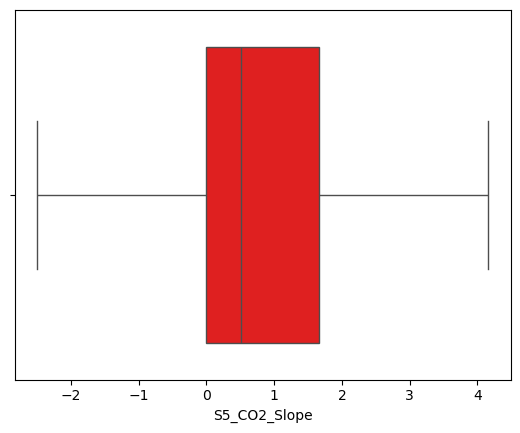

<Figure size 1200x600 with 0 Axes>

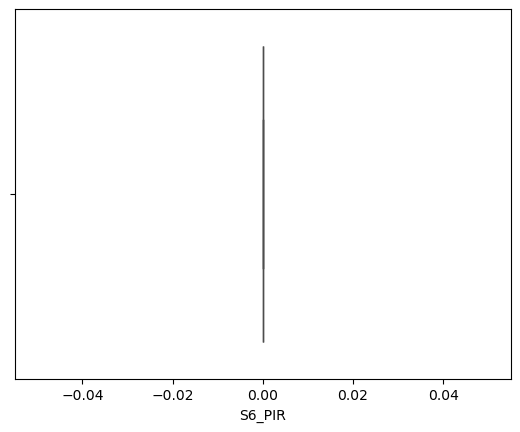

<Figure size 1200x600 with 0 Axes>

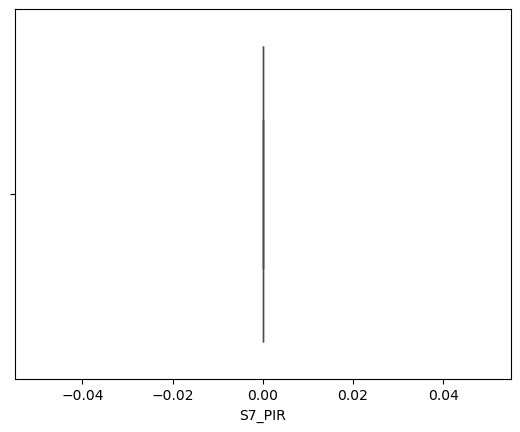

<Figure size 1200x600 with 0 Axes>

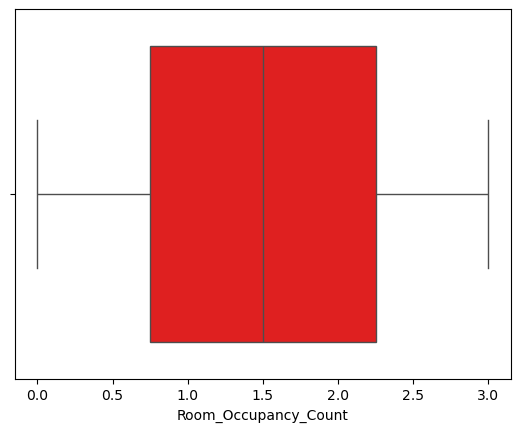

<Figure size 1200x600 with 0 Axes>

In [74]:
for i in num_cols.columns:
    sns.boxplot(x=i,data=df3,color ='r')
    plt.figure(figsize=(12, 6))
    plt.show()

In [75]:

# skewness

In [76]:
df3.skew()

S1_Temp                -0.415280
S2_Temp                 0.815810
S3_Temp                -0.422312
S4_Temp                -0.766658
S1_Light               -0.606669
S2_Light                0.784905
S3_Light                0.618941
S4_Light                0.567235
S1_Sound                1.180457
S2_Sound                1.242113
S3_Sound                1.197049
S4_Sound                1.167275
S5_CO2                  0.757684
S5_CO2_Slope            0.246055
S6_PIR                  0.000000
S7_PIR                  0.000000
Room_Occupancy_Count    0.000000
dtype: float64

In [77]:
# Correlation

<Axes: >

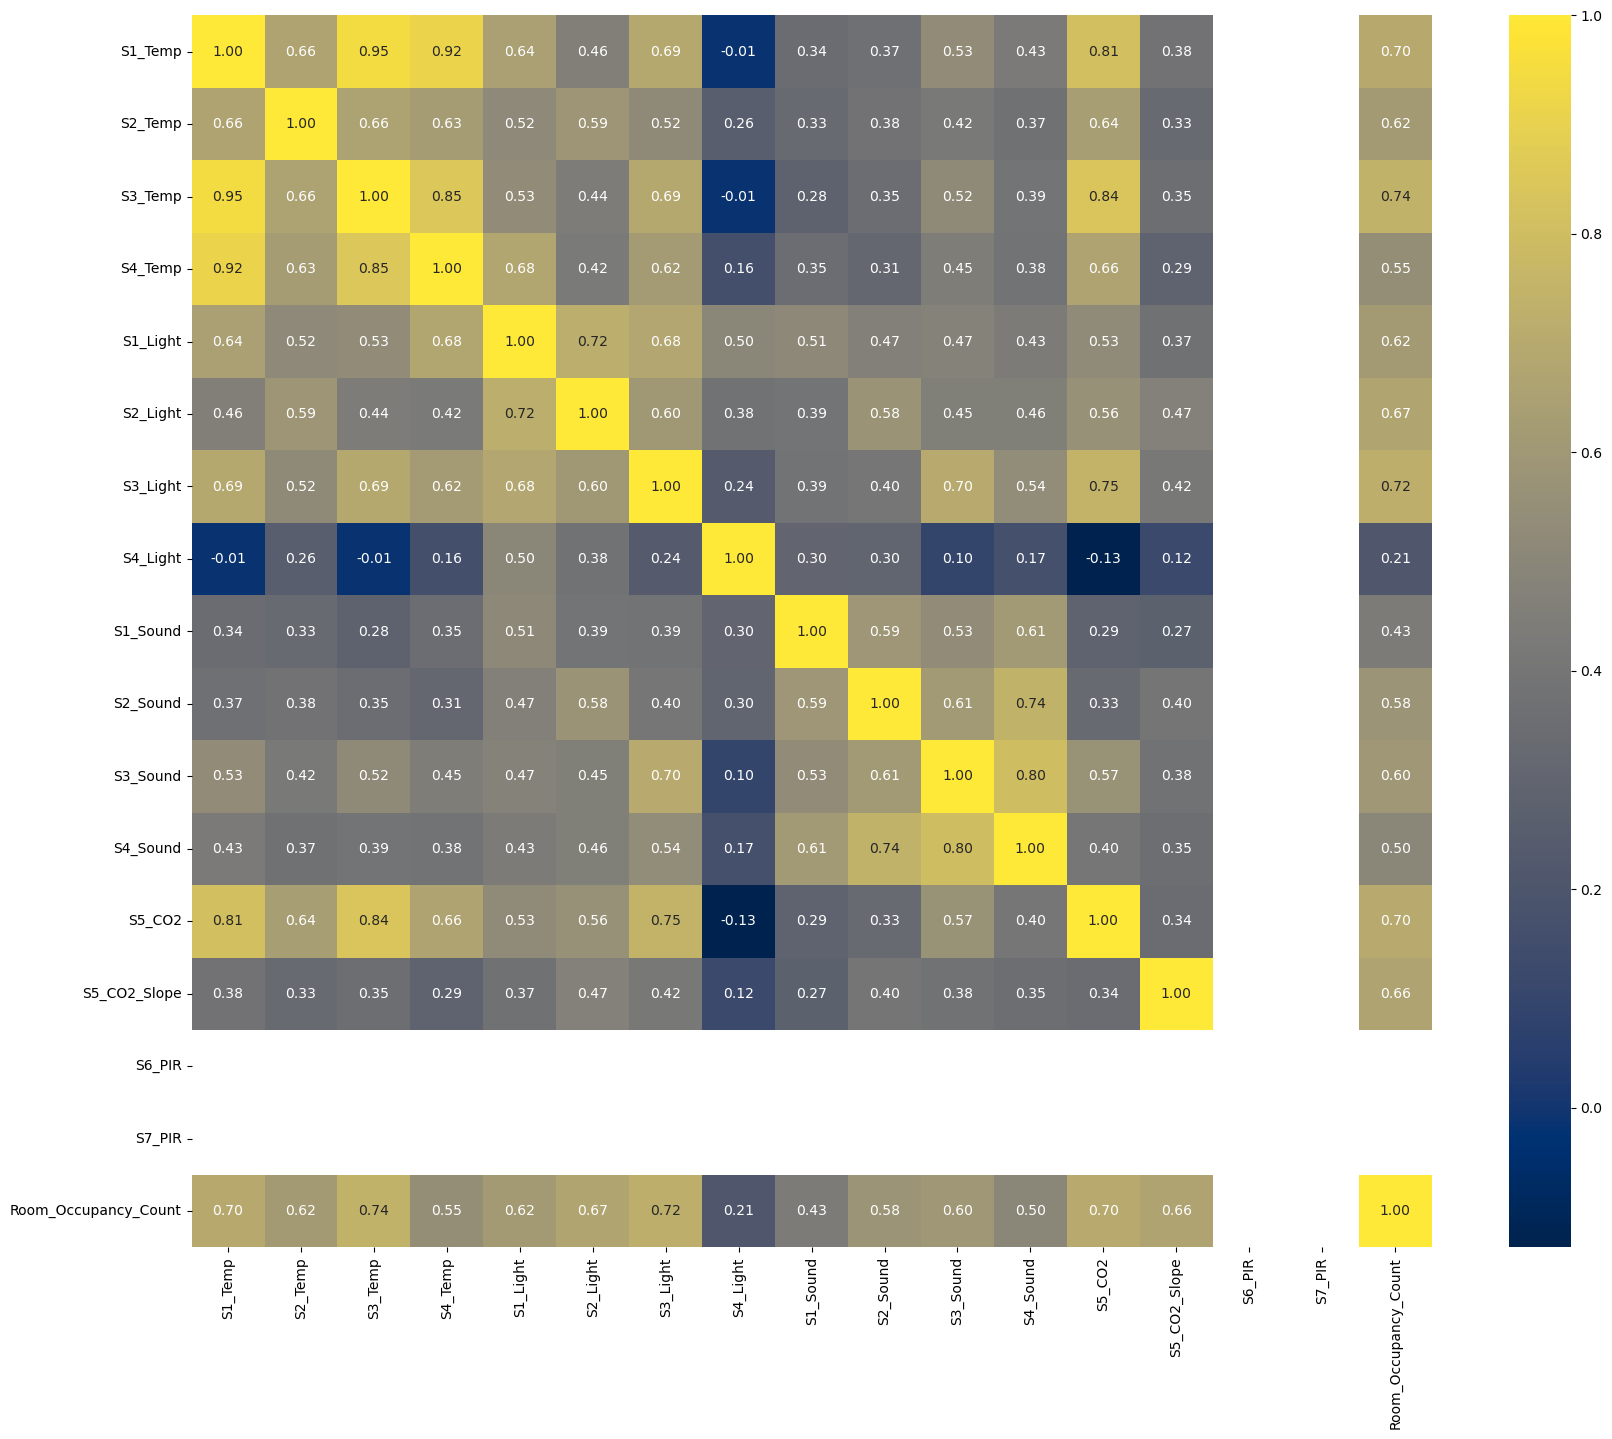

In [78]:
corr =df3.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr,annot=True,cmap="cividis",fmt ='.2f')

In [79]:
# Feature Selection

In [80]:
df3.head(2)

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0.0,0.0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0.0,0.0,1


In [81]:
X = df3.drop(['Room_Occupancy_Count'],axis=1)
y= df3['Room_Occupancy_Count']

In [82]:
sk = SelectKBest(score_func = f_classif, k=10)

In [83]:
X_new = sk.fit_transform(X,y)

C:\Users\IDEAPAD SLIM 3\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\IDEAPAD SLIM 3\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [84]:
selected_features = X.columns[sk.get_support()]

In [85]:
feature_score = pd.DataFrame({'Feature':X.columns,'score':sk.scores_}).sort_values(by='score',ascending =False)

In [86]:
print(selected_features )
print("/nfeature scores:")
print(feature_score)

Index(['S1_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light',
       'S2_Sound', 'S3_Sound', 'S5_CO2', 'S5_CO2_Slope'],
      dtype='object')
/nfeature scores:
         Feature         score
4       S1_Light  26163.859904
2        S3_Temp  13675.669723
6       S3_Light  13638.071702
0        S1_Temp  12857.018195
12        S5_CO2  11573.441195
5       S2_Light   9809.525992
13  S5_CO2_Slope   8792.686215
9       S2_Sound   7665.446218
3        S4_Temp   7644.958267
10      S3_Sound   7459.751881
1        S2_Temp   6744.130578
11      S4_Sound   5480.971483
8       S1_Sound   3987.447131
7       S4_Light   3169.582260
14        S6_PIR           NaN
15        S7_PIR           NaN


In [87]:
X_selected = X[selected_features]

In [88]:
X_selected.head(2)

,S1_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S2_Sound,S3_Sound,S5_CO2,S5_CO2_Slope
0,24.94,24.56,25.38,121,34,53,0.19,0.06,390,0.769231
1,24.94,24.56,25.44,121,33,53,0.05,0.06,390,0.646154


In [89]:
# scaling

In [90]:
scaler = StandardScaler()

In [91]:
X_scaled = scaler.fit_transform(X_selected)

In [92]:
X_scaled

array([[-2.16897623, -1.89119737, -1.91794841, ..., -0.76302087,
        -0.8766593 , -0.03552899],
       [-2.16897623, -1.89119737, -1.74128925, ..., -0.76302087,
        -0.8766593 , -0.12828534],
       [-2.01574944, -2.0238704 , -1.74128925, ..., -0.68233884,
        -0.8766593 , -0.22394032],
       ...,
       [ 1.17647529,  1.02760909,  0.82026867, ..., -0.07855229,
         1.12553761,  2.23222401],
       [ 0.69125713,  1.21695224,  0.74481025, ...,  2.04389856,
         1.18909942,  0.57283311],
       [ 1.02324851,  0.8728239 ,  0.71454103, ...,  2.04389856,
         0.67265974,  1.71212829]])

In [93]:
# Train Test Split

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size =0.2,random_state=42)

In [95]:
print(F"X_train:{X_train.shape}\nX_test:{X_test.shape}\ny_train:{y_train.shape}\ny_test:{y_train.shape}\n ")

X_train:(26329, 10)
X_test:(6583, 10)
y_train:(26329,)
y_test:(26329,)
 


In [96]:
# Model Building

In [97]:
models ={
    '1.LogisticRegression':LogisticRegression(),
    '2. SVC':SVC(),
    '3. DecisionTreeClassifier':DecisionTreeClassifier(),
    '4. Randomforest':RandomForestClassifier(),
    '5.Gradient Boosting': GradientBoostingClassifier(),
    '6.AdaBoost': AdaBoostClassifier(),
    '7.Naive Bayes':GaussianNB()
}

In [98]:
results ={}
for name,model in models.items():
    print(f"\nTraining Name{name}--->")
    model.fit(X_train,y_train)
    y_pred    = model.predict(X_test)
    accuracy  = accuracy_score(y_test,y_pred)
    results[name]= {
        'model':model,
        'accuracy':accuracy_score,
        'Report':classification_report(y_test,y_pred)
    }

    print(f"{name} Accuracy: {accuracy:.4f}")
    print("\nClassificationReport")
    print(results[name]['Report'])


Training Name1.LogisticRegression--->
1.LogisticRegression Accuracy: 0.9874

ClassificationReport
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1602
           1       1.00      1.00      1.00      1647
           2       0.98      0.97      0.98      1647
           3       0.98      0.98      0.98      1687

    accuracy                           0.99      6583
   macro avg       0.99      0.99      0.99      6583
weighted avg       0.99      0.99      0.99      6583


Training Name2. SVC--->
2. SVC Accuracy: 0.9912

ClassificationReport
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1602
           1       1.00      1.00      1.00      1647
           2       0.98      0.98      0.98      1647
           3       0.98      0.99      0.98      1687

    accuracy                           0.99      6583
   macro avg       0.99      0.99      0.99      6583
weighted avg   

C:\Users\IDEAPAD SLIM 3\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


6.AdaBoost Accuracy: 0.7181

ClassificationReport
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1602
           1       0.94      1.00      0.97      1647
           2       0.56      0.94      0.70      1647
           3       0.41      0.08      0.13      1687

    accuracy                           0.72      6583
   macro avg       0.68      0.72      0.66      6583
weighted avg       0.68      0.72      0.66      6583


Training Name7.Naive Bayes--->
7.Naive Bayes Accuracy: 0.9401

ClassificationReport
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1602
           1       1.00      0.98      0.99      1647
           2       0.86      0.96      0.90      1647
           3       0.93      0.85      0.89      1687

    accuracy                           0.94      6583
   macro avg       0.94      0.94      0.94      6583
weighted avg       0.94      0.94      0.94      6

In [99]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
    random_state=42,
    n_estimators=50,         
    max_depth=10,             
    min_samples_split=5,      
    min_samples_leaf=2,       
    max_features='sqrt',      
    n_jobs=-1                
)

In [100]:
param_grid = {
    'n_estimators': [50, 100, 200,300],  
    'max_depth': [10, 20, None],     
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]   
}

In [101]:
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=10,  
    scoring=['accuracy', 'f1', 'roc_auc'],  # Use multiple metrics
    refit='f1',  # Choose best model based on F1-score
    n_jobs=-1, 
    verbose=2   
)


In [102]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


C:\Users\IDEAPAD SLIM 3\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                              min_samples_split=5,
                                              n_estimators=50, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             refit='f1', scoring=['accuracy', 'f1', 'roc_auc'], verbose=2)

In [103]:
print("Best Parameters:", grid_search.best_params_)  
print(f"Best {grid_search.refit} Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best f1 Score: nan


In [104]:
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best R² Score: nan


In [105]:
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [106]:
from sklearn.metrics import accuracy_score, f1_score

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)


f1 = f1_score(y_test, y_pred, average='macro') 

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")


Accuracy: 0.940148868297129
F1 Score: 0.9409064674025045


In [107]:
# to check if there is overfitting issues

In [108]:

from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, model.predict(X_train))
val_accuracy = accuracy_score(y_test, model.predict(X_test))

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

if train_accuracy > val_accuracy + 0.1:  # 10% threshold for overfitting
    print("Possible overfitting detected!")


Training Accuracy: 0.9396
Validation Accuracy: 0.9401


In [109]:
y_pred = best_model.predict(X_test)

In [110]:
cm = confusion_matrix(y_test,y_pred)

In [111]:
# cross validation

In [112]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-Validation Scores: [0.90915996 0.91629956 0.91811    0.93725311 0.93193558]
Mean CV Accuracy: 0.9225516420687653


In [113]:
model.fit(X_train, y_train)
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9396482965551293


In [114]:
# Save model

In [115]:
import joblib

In [116]:
joblib.dump(best_model,"Occupancy_Estimation")

['Occupancy_Estimation']

In [117]:
load_model = joblib.load("Occupancy_Estimation")

In [118]:
# Pipe Line

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [120]:
# Define numerical columns (excluding Date and Time)
numerical_cols = [
    'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
    'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
    'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR'
]

target_col = 'Room_Occupancy_Count'

# Numerical transformer
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessor (only numerical features in this case)
preprocessor = ColumnTransformer(
    transformers=[('num', num_transformer, numerical_cols)]
)

# Final pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Features and target
X = df[numerical_cols]
y = df[target_col]

# Fit the pipeline
pipeline.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['S1_Temp', 'S2_Temp',
                                                   'S3_Temp', 'S4_Temp',
                                                   'S1_Light', 'S2_Light',
                                                   'S3_Light', 'S4_Light',
                                                   'S1_Sound', 'S2_Sound',
                                                   'S3_Sound', 'S4_Sound',
                                                   'S5_CO2', 'S5_CO2_Slope',
                                                   'S6_PIR', 'S7_PIR'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [121]:
joblib.dump(pipeline,'room_occupancy.joblib')

['room_occupancy.joblib']

In [122]:
loaded_pipeline=joblib.load('room_occupancy.joblib')

In [128]:
df_unseen=pd.read_csv('Unseen1.csv')

In [130]:
df_unseen.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
0,25.94,26.000000,25.386920,26.256920,161,252,80,60,0.671927,1.415263,0.416920,0.284234,529,2.228066,1,0
1,25.81,26.810000,25.500000,26.310000,119,26,48,35,0.471710,0.114530,0.092735,0.099060,415,-1.907988,0,0
2,26.19,25.839651,25.715415,26.310000,117,22,187,10,0.799603,0.250698,0.957112,0.204585,700,1.351565,0,0
3,25.44,25.440000,25.190000,26.060000,0,0,2,2,0.080000,0.050000,0.070000,0.100000,350,0.000000,0,0
4,26.25,27.476895,25.880000,26.320388,148,235,178,10,2.016438,0.253036,0.285868,0.216256,890,2.815701,1,1


In [132]:
# Drop the target column to create X_unseen
X_unseen = df_unseen.drop(columns=['Room_Occupancy_Count'], errors='ignore')

# Extract the target column if available
y_unseen = df_unseen['Room_Occupancy_Count'] if 'Room_Occupancy_Count' in df_unseen else None


In [136]:
y_predunseen=loaded_pipeline.predict(X_unseen)

In [138]:
df_unseen['y_predicted']=y_predunseen

In [140]:
df_unseen.head(20)

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,y_predicted
0,25.940000,26.000000,25.386920,26.256920,161,252,80,60,0.671927,1.415263,0.416920,0.284234,529,2.228066,1,0,2
1,25.810000,26.810000,25.500000,26.310000,119,26,48,35,0.471710,0.114530,0.092735,0.099060,415,-1.907988,0,0,1
2,26.190000,25.839651,25.715415,26.310000,117,22,187,10,0.799603,0.250698,0.957112,0.204585,700,1.351565,0,0,2
3,25.440000,25.440000,25.190000,26.060000,0,0,2,2,0.080000,0.050000,0.070000,0.100000,350,0.000000,0,0,0
4,26.250000,27.476895,25.880000,26.320388,148,235,178,10,2.016438,0.253036,0.285868,0.216256,890,2.815701,1,1,3
5,26.060000,25.750000,25.560000,26.310000,118,28,50,28,0.080000,0.050000,0.112723,0.060000,605,0.285109,0,0,1
6,26.190000,25.871730,25.682911,26.387089,118,23,190,12,0.856371,0.617004,1.284726,0.477637,670,3.186059,0,0,2
7,25.060000,25.060000,24.630000,25.310000,7,7,36,24,0.070000,0.050000,0.050000,0.060000,360,0.026923,0,0,0
8,26.130000,25.810000,25.630000,26.336803,118,24,192,14,0.483749,0.699552,1.734381,0.295907,606,1.657434,0,0,2
9,25.060000,25.060000,24.560000,25.250000,0,0,1,0,0.080000,0.040000,0.050000,0.090000,345,0.000000,0,0,0


In [142]:
joblib.dump(pipeline, 'Random_Forest_model.joblib')

['Random_Forest_model.joblib']

In [148]:
predictions=loaded_pipeline.predict(df_unseen)

In [150]:
print(f" predictions : {predictions}")

 predictions : [2 1 2 ... 3 2 2]
